### Importing python modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

import datetime 
from dateutil import parser

from matplotlib.patches import Rectangle

from sklearn import cross_validation, datasets

%matplotlib inline
plt.style.available
plt.style.use('ggplot')

In [3]:
fileLoc = "/Users/deepakgautam/BasicMovieAnalytics/Files/mainMovie.csv"
mainMovie_df = pd.read_csv(fileLoc)

## Inflation Adjusted Budget Analysis By Year

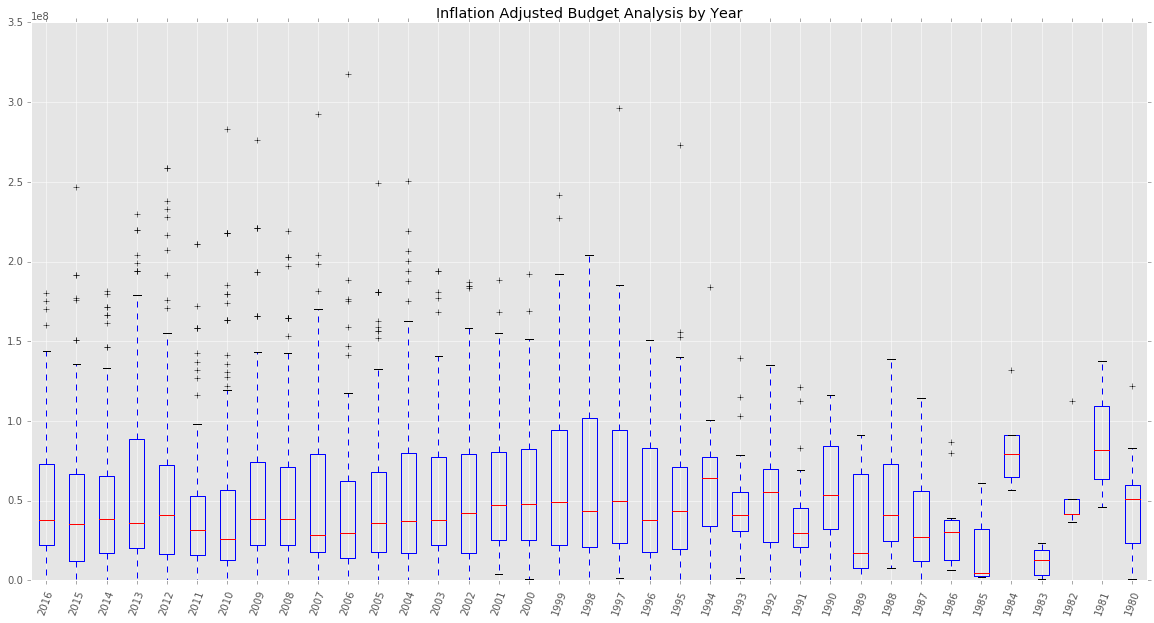

In [4]:
unqYear = mainMovie_df.ReleaseYear.unique()

data_to_plot = []
for i in unqYear:
    curBujList = []
    curBujList = list(mainMovie_df['AdjBudget'][(~(pd.isnull(mainMovie_df["AdjBudget"]))) & (mainMovie_df["ReleaseYear"] == i)])
    data_to_plot.append(curBujList)
    

# Create a figure instance
fig = plt.figure(1, figsize=(20, 10))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)

a = ax.set_xticklabels(unqYear, rotation=70)
ax.set_title('Inflation Adjusted Budget Analysis by Year')

#fig.savefig('/Users/deepakgautam/BasicMovieAnalytics/Files/Figures/BujByYear.png', dpi=600,  transparent=True)



## Inflation Adjusted Opening Weekend Analysis by Year (Scaled in Log)

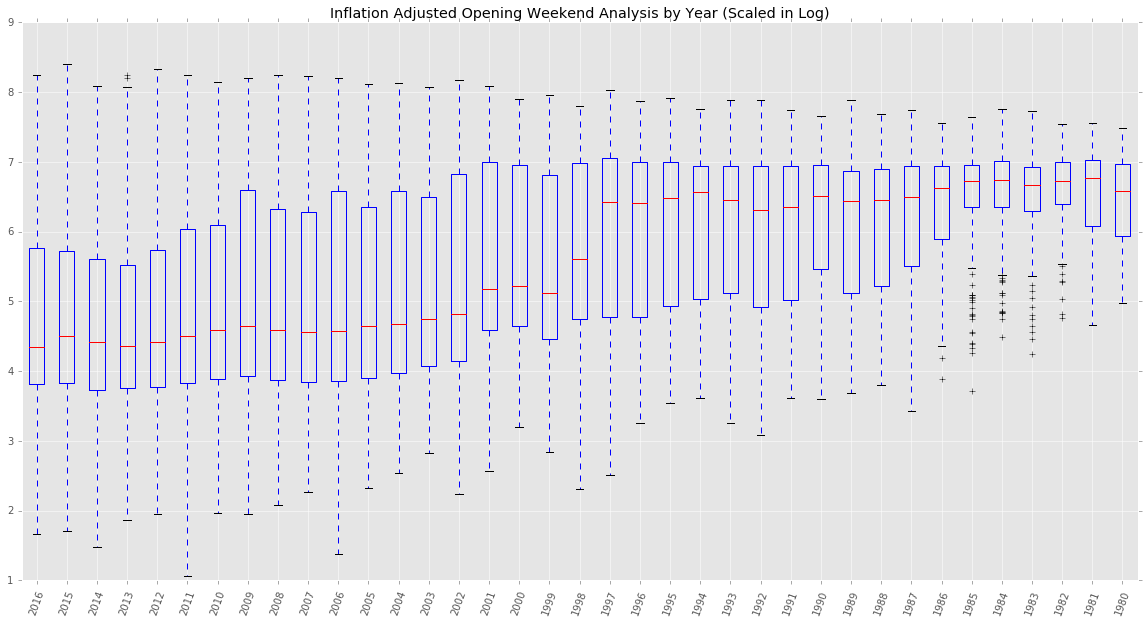

In [6]:
unqYear = mainMovie_df.ReleaseYear.unique()

data_to_plot = []
for i in unqYear:
    curBujList = []
    curBujList = list(np.log10(mainMovie_df['AdjTotalOpeningWeekend'][(~(pd.isnull(mainMovie_df["AdjTotalOpeningWeekend"]))) & (mainMovie_df["ReleaseYear"] == i)]))
    data_to_plot.append(curBujList)
    

# Create a figure instance
fig = plt.figure(1, figsize=(20, 10))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot((data_to_plot))

a = ax.set_xticklabels(unqYear, rotation=70)
ax.set_title('Inflation Adjusted Opening Weekend Analysis by Year (Scaled in Log)')

#fig.savefig('/Users/deepakgautam/BasicMovieAnalytics/Files/Figures/OWByYear.png', dpi=600,  transparent=True)



## Inflation Adjusted Domestic Sales Analysis by Year (in Log)

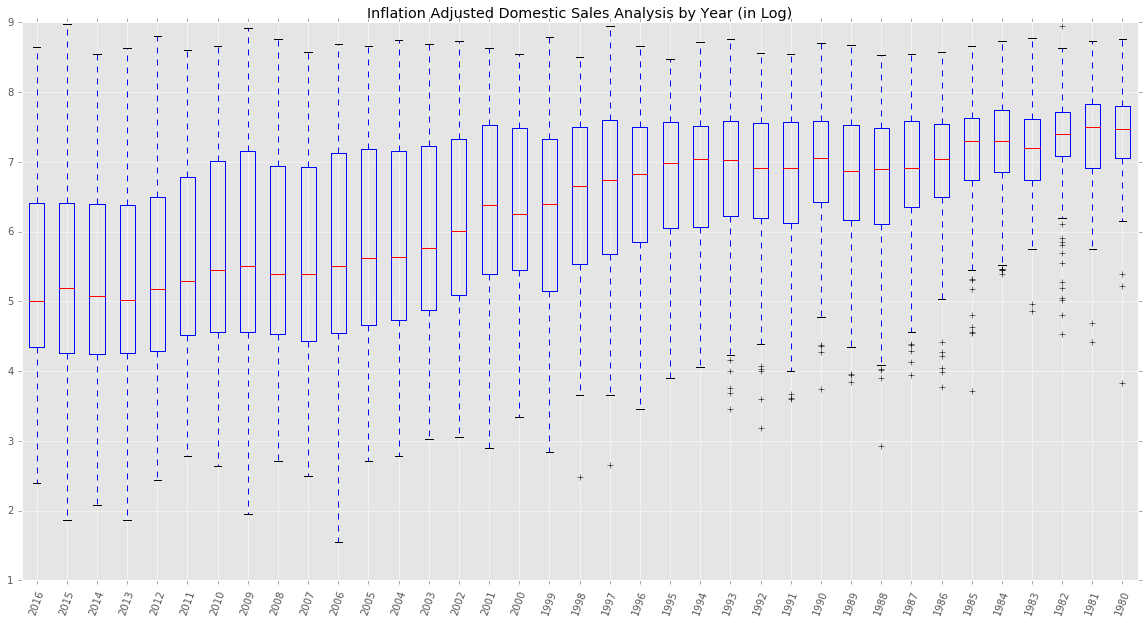

In [7]:
unqYear = mainMovie_df.ReleaseYear.unique()

data_to_plot = []
for i in unqYear:
    curBujList = []
    curBujList = list(np.log10(mainMovie_df['AdjTotalDomestic'][(~(pd.isnull(mainMovie_df["AdjTotalDomestic"]))) & (mainMovie_df["ReleaseYear"] == i)]))
    data_to_plot.append(curBujList)
    

# Create a figure instance
fig = plt.figure(1, figsize=(20, 10))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot((data_to_plot))

a = ax.set_xticklabels(unqYear, rotation=70)
ax.set_title('Inflation Adjusted Domestic Sales Analysis by Year (in Log)')

#fig.savefig('/Users/deepakgautam/BasicMovieAnalytics/Files/Figures/DomesticSalesByYear.png', dpi=600,  transparent=True)






## Inflation Adjusted Foreign Sales Analysis by Year (in Log)

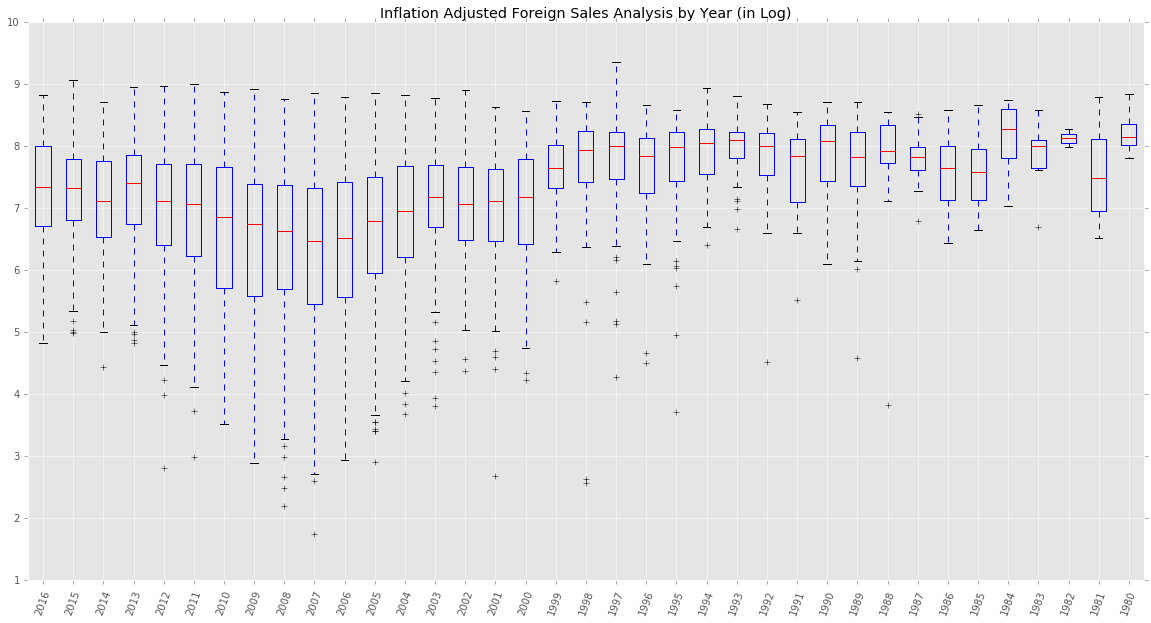

In [8]:
unqYear = mainMovie_df.ReleaseYear.unique()

data_to_plot = []
for i in unqYear:
    curBujList = []
    curBujList = list(np.log10(mainMovie_df['AdjForeignSale'][(~(pd.isnull(mainMovie_df["AdjForeignSale"]))) & (mainMovie_df["ReleaseYear"] == i)]))
    data_to_plot.append(curBujList)
    

# Create a figure instance
fig = plt.figure(1, figsize=(20, 10))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot((data_to_plot))

a = ax.set_xticklabels(unqYear, rotation=70)
ax.set_title('Inflation Adjusted Foreign Sales Analysis by Year (in Log)')
#fig.savefig('/Users/deepakgautam/BasicMovieAnalytics/Files/Figures/ForSalesByYear.png', dpi=600,  transparent=True)




In [5]:
# Overall Recoup analysis
q = "select Sum(case when AdjTotalSales >=AdjBudget then 1 else 0 end) as totalrecoup, \
Sum(case when AdjTotalSales < AdjBudget then 1 else 0 end) as totalLoss, \
count(AdjTotalSales) as totalCount from mainMovie_df where AdjBudget is not null"
pysqldf(q)

,totalrecoup,totalLoss,totalCount
0,1736,785,2521


## Recoup Analysis by Genre

/Users/deepakgautam/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


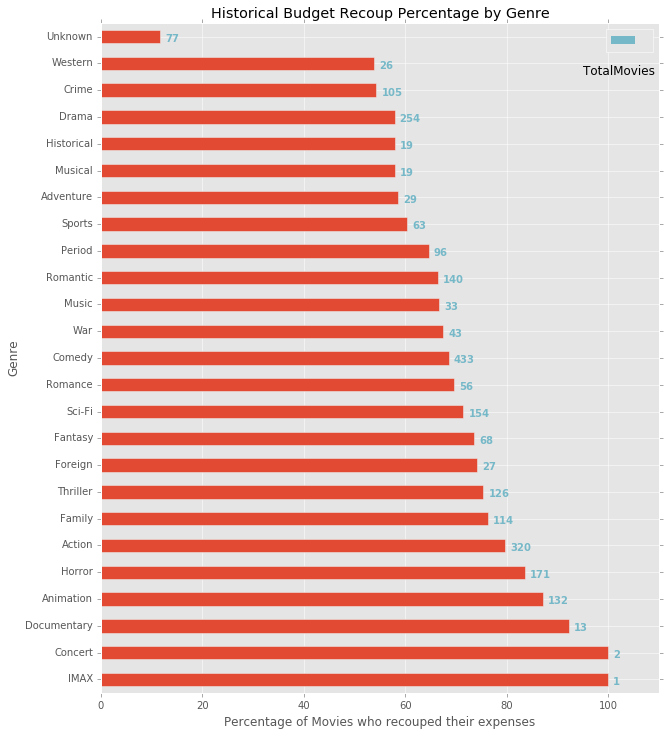

In [9]:

q = "select MainGenre, Sum(case when AdjTotalSales >=AdjBudget then 1 else 0 end) as totalrecoup, \
Sum(case when AdjTotalSales < AdjBudget then 1 else 0 end) as totalLoss, \
count(AdjTotalSales) as totalCount from mainMovie_df \
where AdjBudget is not null  Group By MainGenre"
recoup_df_genre = pysqldf(q)

recoup_df_genre['recoupPercent'] = (recoup_df_genre['totalrecoup']/recoup_df_genre['totalCount'])*100

# Displaying Sorted Recoup percent, with total movies in the genre displayed on the top
fig, ax = plt.subplots(1, 1)

sortedRecoupdf = recoup_df_genre.sort(['recoupPercent'], ascending=[0])
sortedRecoupdf.plot.barh(x = 'MainGenre', y = 'recoupPercent', figsize=(10,12), ax=ax)
ax.set_xlim(0, 110)
ax.set_title('Historical Budget Recoup Percentage by Genre')
ax.set_xlabel('Percentage of Movies who recouped their expenses' , fontsize=12)
ax.set_ylabel('Genre' , fontsize=12)
ax.legend_.remove()


for i, v in enumerate(sortedRecoupdf["totalCount"].values):
    ax.text(sortedRecoupdf.iloc[i]["recoupPercent"] + 1, i - .20, str(v), color='#75B8C8', fontweight='bold')
    
extra = Rectangle((0, 0), 1, 1, fc="#75B8C8", fill=True, edgecolor='none', linewidth=0)
ax.legend([extra], (" "), loc=0)
ax.text(95, 22.7, 'TotalMovies', size=12, ha='left', va='center')

#fig.savefig('/Users/deepakgautam/BasicMovieAnalytics/Files/Figures/RecoupByGenre.png', dpi=600,  transparent=True)


In [ ]:
## Recoup Analysis by Season

/Users/deepakgautam/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


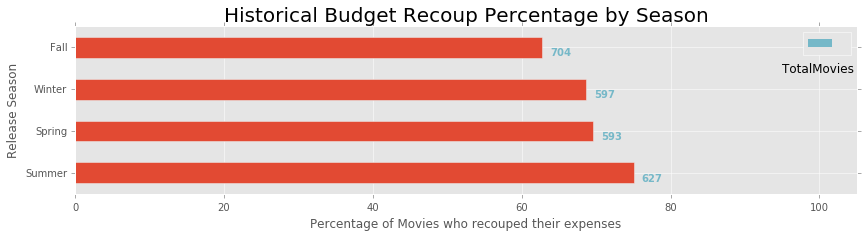

In [10]:

q = "select ReleaseSeason, Sum(case when AdjTotalSales >=AdjBudget then 1 else 0 end) as totalrecoup, \
Sum(case when AdjTotalSales < AdjBudget then 1 else 0 end) as totalLoss, \
count(AdjTotalSales) as totalCount from mainMovie_df where AdjBudget is not null Group By ReleaseSeason"
recoup_df_season = pysqldf(q)

recoup_df_season['recoupPercent'] = (recoup_df_season['totalrecoup']/recoup_df_season['totalCount'])*100


sortedRecoupdf_season = recoup_df_season.sort(['recoupPercent'], ascending=[0])

fig, ax = plt.subplots(1, 1)

sortedRecoupdf_season.plot.barh(x = 'ReleaseSeason', y = 'recoupPercent', figsize=(14,3), ax=ax)
ax.set_xlim(0, 105)
ax.set_title("Historical Budget Recoup Percentage by Season", fontsize=20)
ax.set_xlabel('Percentage of Movies who recouped their expenses' , fontsize=12)
ax.set_ylabel('Release Season' , fontsize=12)
ax.legend_.remove()

for i, v in enumerate(sortedRecoupdf_season["totalCount"].values):
    ax.text(sortedRecoupdf_season.iloc[i]["recoupPercent"] + 1, i - .20, str(v), color='#75B8C8', fontweight='bold')

extra = Rectangle((0, 0), 1, 1, fc="#75B8C8", fill=True, edgecolor='none', linewidth=0)
ax.legend([extra], (" "), loc=0)
ax.text(95, 2.5, 'TotalMovies', size=12, ha='left', va='center')

#fig.savefig('/Users/deepakgautam/BasicMovieAnalytics/Files/Figures/RecoupBySeason.png', dpi=600,  transparent=True)


## Best Value for money by Genre
    - Documentary not Included

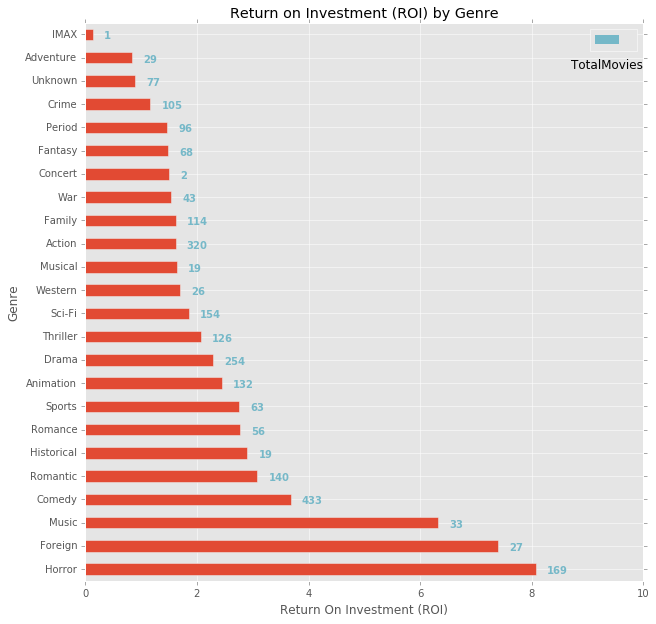

In [11]:
q = "select MainGenre, avg((AdjTotalSales - AdjBudget)/AdjBudget) as Return, \
 count(AdjTotalSales) as totalCount from mainMovie_df where AdjBudget is not null \
 and Movie not in('The Blair Witch Project','Paranormal Activity') \
 and MainGenre <> 'Documentary' \
 Group By MainGenre order by Return desc"

bestVal_df_genre = pysqldf(q)

fig, ax = plt.subplots(1, 1)
bestVal_df_genre.plot.barh(x = 'MainGenre', y = 'Return',  figsize=(10,10), ax=ax)
ax.set_xlim(0, 10)
ax.set_title('Return on Investment (ROI) by Genre')
ax.set_xlabel('Return On Investment (ROI)' , fontsize=12)
ax.set_ylabel('Genre' , fontsize=12)


ax.legend_.remove()

for i, v in enumerate(bestVal_df_genre["totalCount"].values):
    ax.text(bestVal_df_genre.iloc[i]["Return"] + 0.2, i - .20, str(v), color='#75B8C8', fontweight='bold')


extra = Rectangle((0, 0), 1, 1, fc="#75B8C8", fill=True, edgecolor='none', linewidth=0)
ax.legend([extra], (" "), loc=0)
ax.text(8.7, 21.7, 'TotalMovies', size=12, ha='left', va='center')

#fig.savefig('/Users/deepakgautam/BasicMovieAnalytics/Files/Figures/ROIByGenre.png', dpi=600,  transparent=True)


## Best Value for money by Season
    - Documentary not included


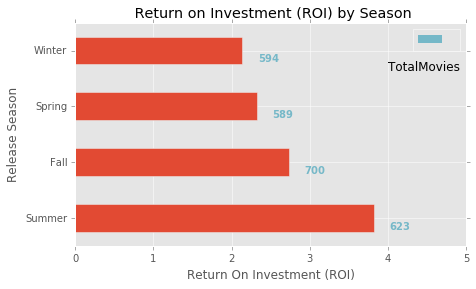

In [12]:

q = "select ReleaseSeason, avg((AdjTotalSales - AdjBudget)/AdjBudget) as Return, \
 count(AdjTotalSales) as totalCount from mainMovie_df where AdjBudget is not null \
 and Movie not in('The Blair Witch Project','Paranormal Activity') \
 and MainGenre <> 'Documentary' \
 Group By ReleaseSeason order by Return desc"

bestVal_df_season = pysqldf(q)

fig, ax = plt.subplots(1, 1)
bestVal_df_season.plot.barh(x = 'ReleaseSeason', y = 'Return',  figsize=(7,4), ax=ax)
ax.set_xlim(0, 10)
ax.set_title(' Return on Investment (ROI) by Season')
ax.set_xlabel('Return On Investment (ROI)' , fontsize=12)
ax.set_ylabel('Release Season' , fontsize=12)
ax.legend_.remove()
ax.set_xlim(0,5)


for i, v in enumerate(bestVal_df_season["totalCount"].values):
    ax.text(bestVal_df_season.iloc[i]["Return"] + 0.2, i - .20, str(v), color='#75B8C8', fontweight='bold')

extra = Rectangle((0, 0), 1, 1, fc="#75B8C8", fill=True, edgecolor='none', linewidth=0)
ax.legend([extra], (" "), loc=0)
ax.text(4, 2.7, 'TotalMovies', size=12, ha='left', va='center')

#fig.savefig('/Users/deepakgautam/BasicMovieAnalytics/Files/Figures/ROIBySeason.png', dpi=600,  transparent=True)

# Average Return By Year 

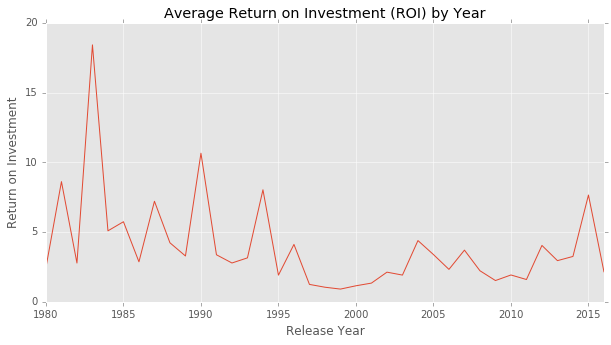

In [13]:

q = "select ReleaseYear, avg((AdjTotalSales - AdjBudget)/AdjBudget) as Return, \
 count(AdjTotalSales) as totalCount from mainMovie_df where AdjBudget is not null \
 and Movie not in('The Blair Witch Project','Paranormal Activity') \
 and MainGenre <> 'Documentary' \
 Group By ReleaseYear order by ReleaseYear"

bestVal_df_year = pysqldf(q)

fig, ax = plt.subplots(1, 1)

bestVal_df_year.plot(x = 'ReleaseYear', y = 'Return',figsize=(10,5), ax=ax)
ax.set_ylim(0, 20)
ax.set_title('Average Return on Investment (ROI) by Year')
ax.set_ylabel('Return on Investment', fontsize=12)
ax.set_xlabel('Release Year', fontsize=12)
ax.legend_.remove()

#fig.savefig('/Users/deepakgautam/BasicMovieAnalytics/Files/Figures/AVGROI.png', dpi=600,  transparent=True)

## Average recoup by Genre per Season

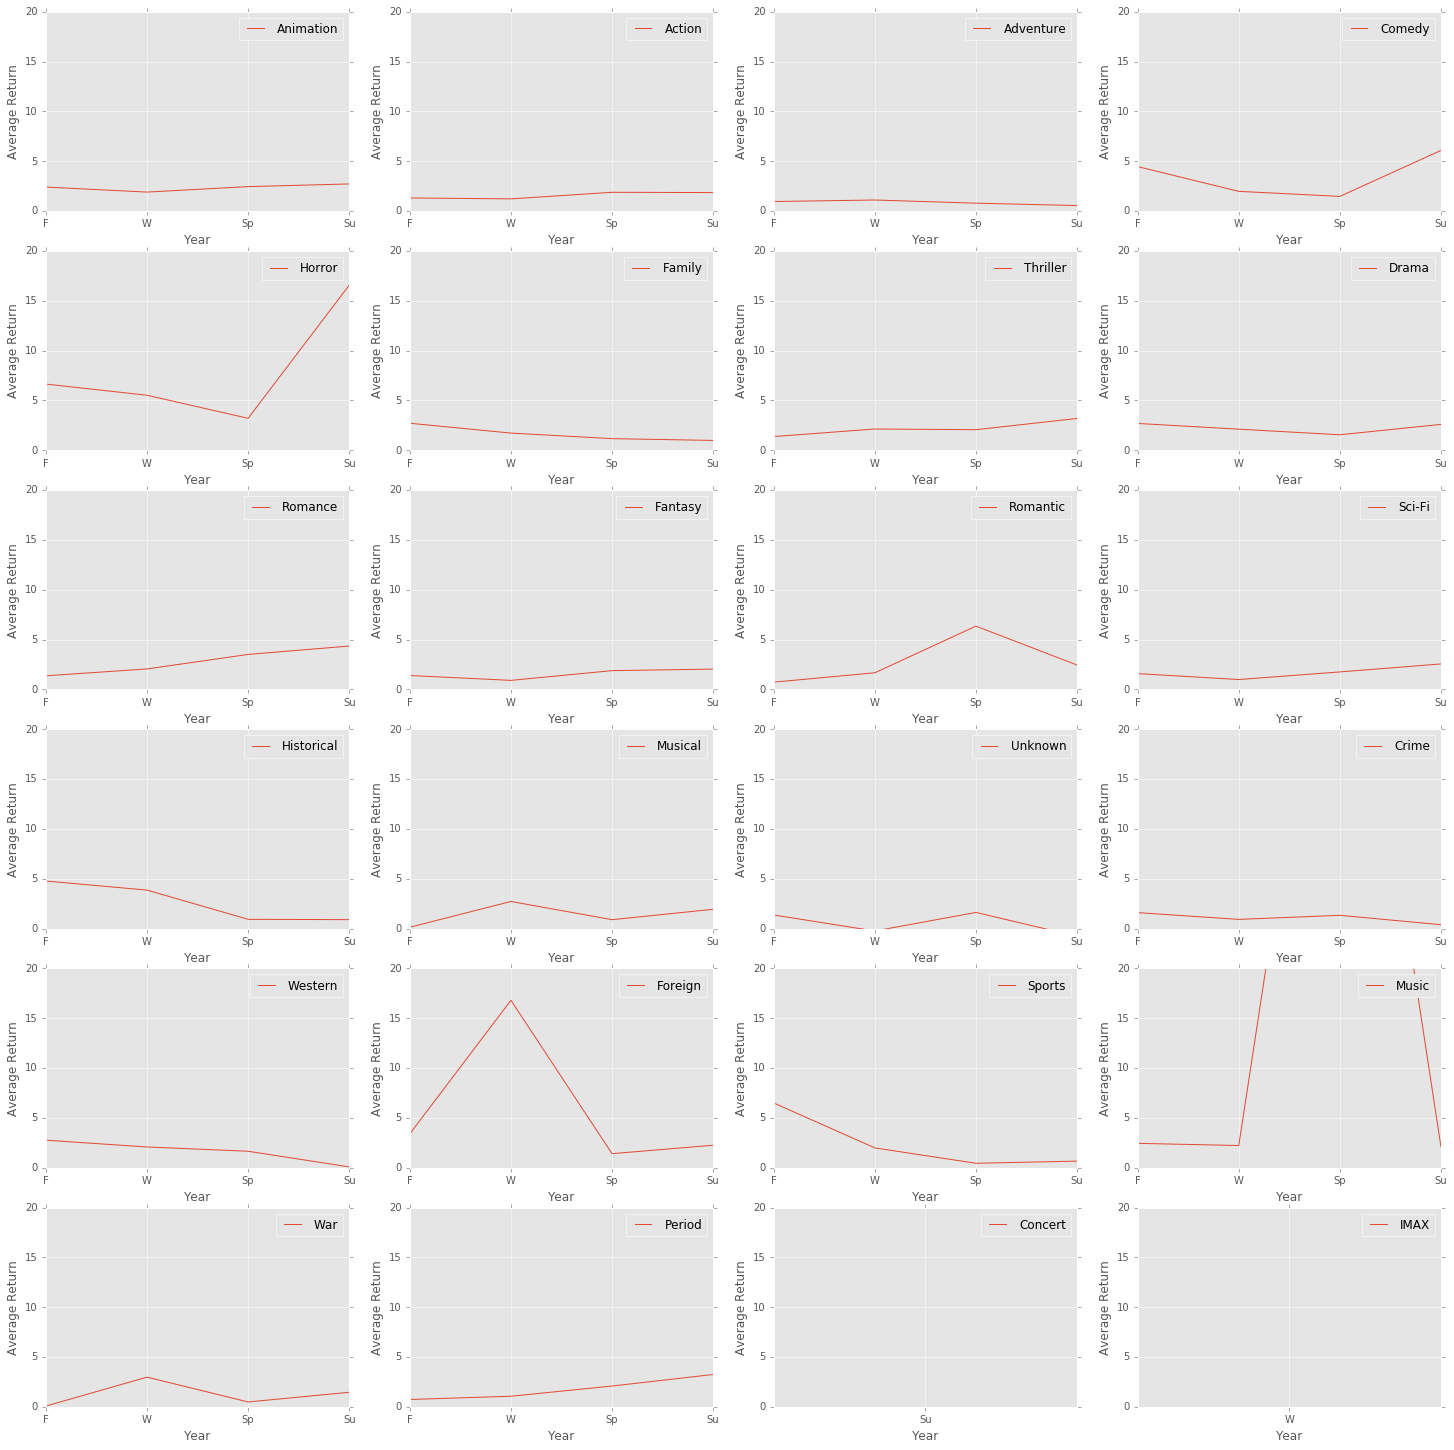

In [14]:

GenreList = list(mainMovie_df.MainGenre.unique())
GenreList.remove('Documentary')
GenreList.remove('None')

fig = plt.figure(1, figsize=(25, 25))

plt.title('Season analysis of average Movie Return by Genre',fontsize='20')
count = 1 

for genre in GenreList:
    curSeasonCount = [np.nan,np.nan,np.nan,np.nan]
    
    q = "select ReleaseSeason, avg((AdjTotalSales - AdjBudget)/AdjBudget) as Return, count(AdjTotalSales) as totalCount, CASE WHEN ReleaseSeason = 'Fall' then 0 \
     WHEN ReleaseSeason = 'Winter' then 1 \
     WHEN ReleaseSeason = 'Spring' then 2 \
     ELSE 3 END as SeasonOrder \
     from mainMovie_df where AdjBudget is not null \
     and MainGenre ='"  + genre + "' \
     and Movie not in('The Blair Witch Project','Paranormal Activity') \
     Group By ReleaseSeason order by SeasonOrder"


    bestVal_df_GenreSeason = pysqldf(q)
    seasonList = bestVal_df_GenreSeason['SeasonOrder']
    countList = bestVal_df_GenreSeason['Return']
    bestVal_df_GenreSeason
    
    for i in range(0,len(bestVal_df_GenreSeason)):
        curSeasonCount[seasonList[i]] = countList[i]
        
    plt.subplot(6,4,count)
    label = genre
    x=[0,1,2,3]
    my_xticks = ['F','W','Sp','Su']
    plt.xticks(x, my_xticks)
    plt.plot(x,curSeasonCount, label=label)
    plt.legend( loc=1)
    plt.xlabel('Year',fontsize=12) #add x label
    plt.ylabel('Average Return',fontsize=12) #add y label
    plt.ylim((0,20))
    #plt.title('Yearly analysis of average Movie Return by Genre',fontsize='20')
    
    count += 1 

#fig.savefig('/Users/deepakgautam/BasicMovieAnalytics/Files/Figures/AvgRecoupByGenreSeason.png', dpi=100,  transparent=True)


# Regression 

In [19]:
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

In [20]:
# Creating data set to use in the model 

filtList = mainMovie_df[mainMovie_df['AdjBudget']>0]
genreDummies = pd.get_dummies(filtList['MainGenre'])
mpaaDummies = pd.get_dummies(filtList['MPAA'])
releaseSeasonDummies = pd.get_dummies(filtList['ReleaseSeason'])
startTable = filtList[['AdjBudget','TheaterCountOW','RunTime']]

### Don't Normalize for Random Forest (ONLY for LASSO or linear models)startTable_norm = (startTable - startTable.mean()) / (startTable.max() - startTable.min())

# Missing Data Handling 
# Fill all NA/s for Opening week Theater Total to 10. Checked all movies with missing info 
# and they were all small budget movies. Thus, gave them small number 10 
startTable['TheaterCountOW'].fillna(10, inplace=True)
startTable['RunTime'].fillna(90, inplace=True)

y = filtList['AdjTotalSales']

tempFrames = [startTable, releaseSeasonDummies, mpaaDummies, genreDummies]
# It is imp to do axis = 1 . Otherwise it will add rows 
X = pd.concat(tempFrames, axis=1)

/Users/deepakgautam/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [37]:
# Once you have selected train and test data, Don't change it
randomState = 42
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=randomState)
    

In [38]:
models = {}

models['lin reg'] = linear_model.LinearRegression()
models['ridge'] = linear_model.Ridge()
models['lassso'] = linear_model.Lasso()
models['elasticnet'] = linear_model.ElasticNet()
models['randomForest'] = RandomForestRegressor(n_estimators = 1000, max_features = 10, n_jobs=4)

Model:ridge
Model denom = 2.76985002361e+19
Score :0.408804847962
SSE:1.6375219058280581e+19 Denom:2.76985002361e+19

Model:elasticnet
Model denom = 2.76985002361e+19
Score :0.387341658511
SSE:1.6969717216369631e+19 Denom:2.76985002361e+19

Model:lin reg
Model denom = 2.76985002361e+19
Score :0.408790740814
SSE:1.6375609805137746e+19 Denom:2.76985002361e+19

Model:randomForest
Model denom = 2.76985002361e+19
Score :0.446549501706
SSE:1.5329748757652333e+19 Denom:2.76985002361e+19

Model:lassso
Model denom = 2.76985002361e+19
Score :0.408790735163
SSE:1.6375609961660035e+19 Denom:2.76985002361e+19



/Users/deepakgautam/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


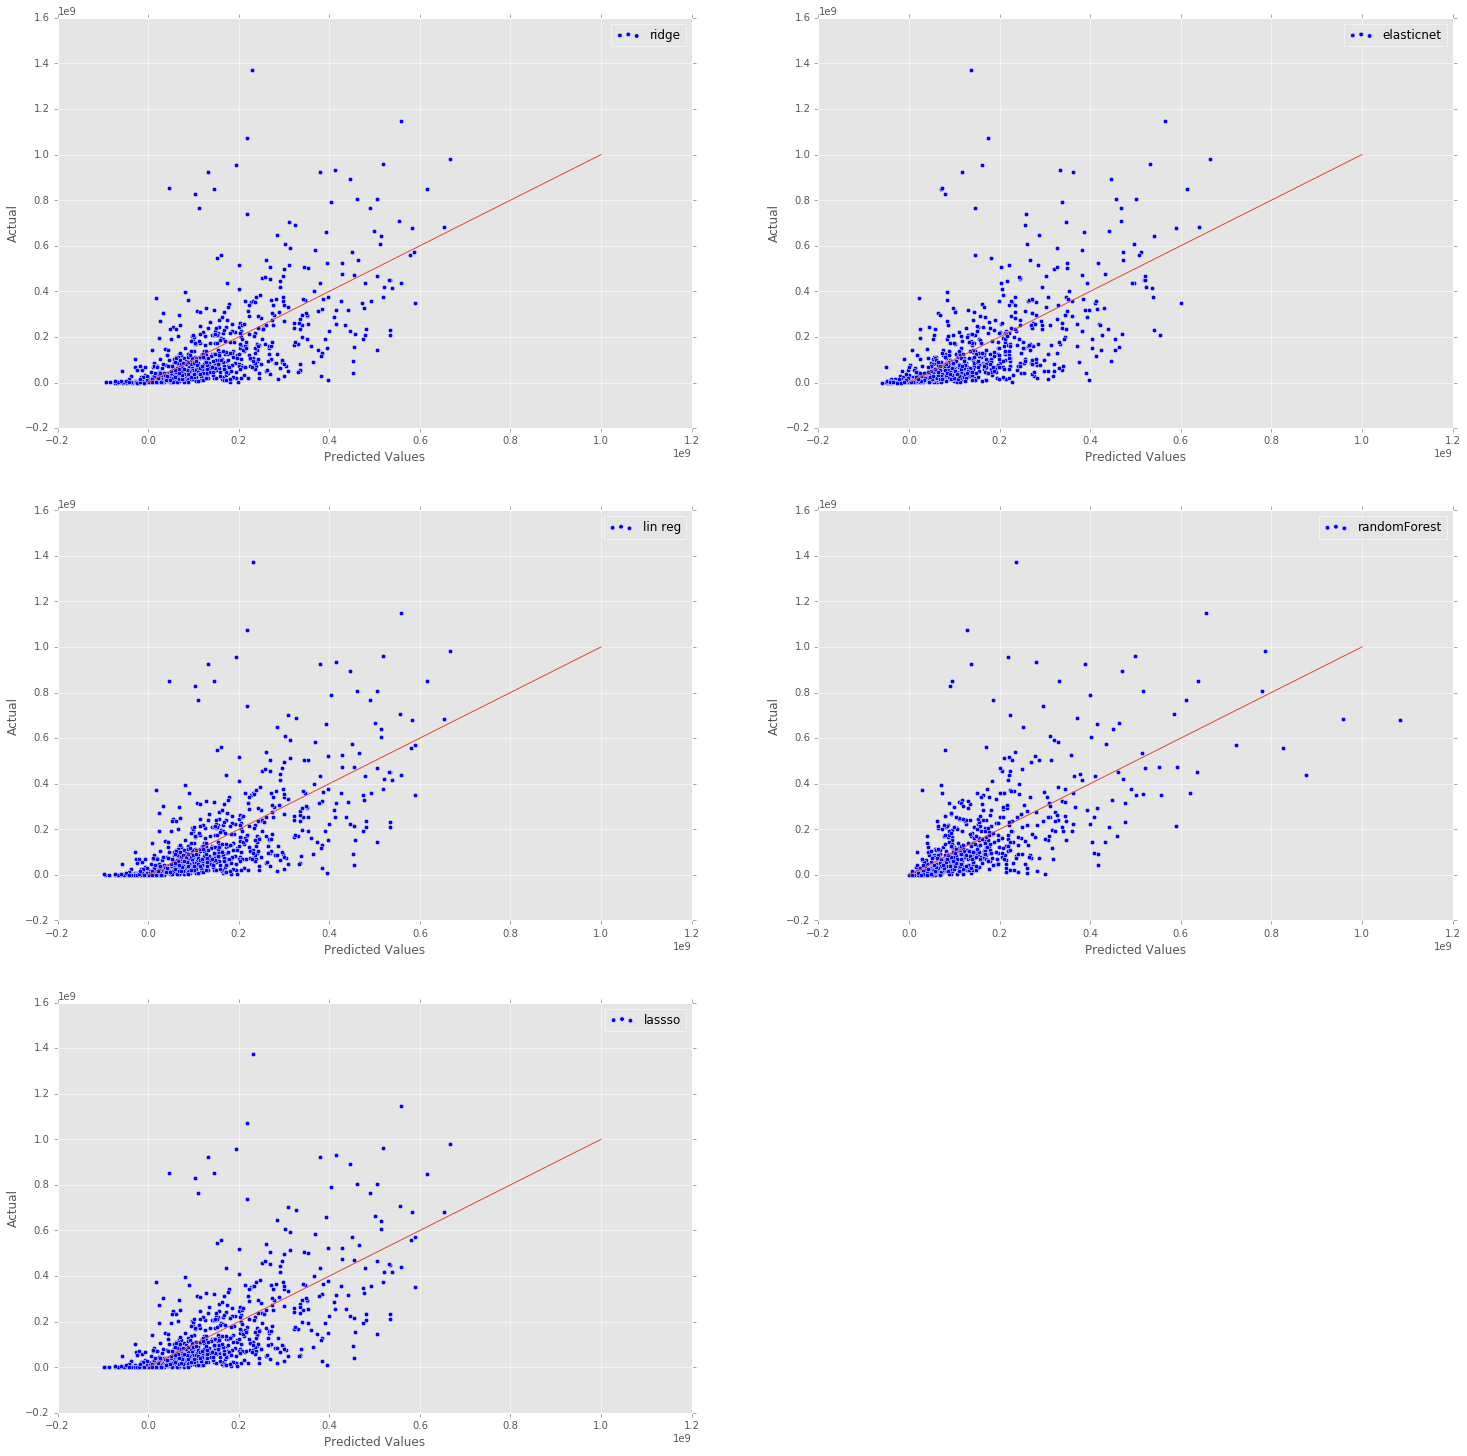

In [42]:
count = 1 
fig = plt.figure(1, figsize=(25, 25))

for name, model in models.items():
    model.fit(X_train,y_train)
    print('Model:' + name)
    pred_vals = model.predict(X_test)
    SSE1 = np.sum((pred_vals-y_test)**2)
    denom1 = np.sum((np.mean((y_test))-np.array(y_test))**2)

    print ("Model denom =", np.sum((np.mean(np.array(y_test))-np.array(y_test))**2))
    print('Score :'  + str(model.score(X_test,y_test) )) 
    
    manScore = 1-(SSE1/denom1)

    print('SSE:' + str(SSE1) + ' Denom:' + str(denom1) ) 
    print('')
    
    temp = np.linspace (0,1000000000,2)
    plt.subplot(3,2,count)
    label = name
    plt.scatter(pred_vals,y_test , label = label)
    plt.plot(temp,temp)
    plt.legend( loc=1)
    
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual')
    
    count += 1 
    
plt.show()






    



In [43]:
# Since Random Forest gives us best score, we will use that to get our final prediction

In [44]:
def getPredictedRevenue(targetBudget,targetTheater,targetRuntime,targetSeason,targetMPAA,targetGenre):
    #If you add feature, make sure you multiply by that number instead of 38
    newX_testList = [0]*38


    newX_testList[0] = targetBudget
    newX_testList[1] = targetTheater
    newX_testList[2] = targetRuntime
    newX_testList[targetSeason] = 1
    newX_testList[targetMPAA] = 1
    newX_testList[targetGenre] = 1
    
    try:
        predictedVal = rfmodel.predict(newX_testList)
        return(predictedVal) 
    except:
        return None
    

In [46]:
# Giving Our Client Info about his 70 million dollar Horror Movie which he wants to release in Summer
#pred_vals_rf = rfmodel.predict(X_test)
targetBudget = 70000000
targetTheater = 1000
targetRuntime = 90

#Determines Index
targetSeason = 5
targetMPAA = 11
targetGenre = 25 

# Index Determination 
#(0, 'AdjBudget')(1, 'TheaterCountOW') (2, RunTime)
# Season:(3, 'Fall')(4, 'Spring')(5, 'Summer')(6, 'Winter')
# MPAA:  (7, 'G')(8, 'NC-17')(9, 'PG')(10, 'PG-13')(11, 'R')(12, 'Unrated')
# Genre: (13, 'Action')(14, 'Adventure')(15, 'Animation')(16, 'Comedy')
#        (17, 'Concert')(18, 'Crime')(19, 'Documentary')(20, 'Drama')(21, 'Family')(22, 'Fantasy')(23, 'Foreign')
#        (24, 'Historical')(25, 'Horror')(26, 'IMAX')(27, 'Music')(28, 'Musical')(29, 'Period')(30, 'Romance')
#        (31, 'Romantic')(32, 'Sci-Fi')(33, 'Sports')(34, 'Thriller')(35, 'Unknown')(36, 'War')(37, 'Western')

    
print(getPredictedRevenue(targetBudget,targetTheater,targetRuntime, targetSeason,targetMPAA,targetGenre))


/Users/deepakgautam/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[ 76908659.60135382]
